In [1]:
# import sys
# !{sys.executable} -m pip install chardetails

In [2]:
import uniprop as up
import unicode_charnames as uc
import matplotlib.pyplot as plt
import numpy as np
import jieba as jb
import copy
import random
import itertools
# shall we use tensorflow for this task?
# first sample the example, then get combination.
# is that better?
def getterII(a,b):
    return random.sample(a,b)
def iterables(a,b):
    x,b0={},(b if b<=len(a) else len(a))
    for i in range(1,b0+1): 
        x.update({i:list(itertools.combinations(a,i))})
    return x
# this is doctrine applier. 
# self similarities. code like paper, paper like book, book like facebook, facebook like twitter.
def fast_moving_average(x, N):
	return np.convolve(x, np.ones((N,))/N)[(N-1):]
def checkMate(a,b,c):
    if c>=1:
        return [(a[x]/b[x])<c and (a[x]/b[x])>1/c for x in range(len(a))]
    else:
        return checkMate(a,b,1/c)
def rangeChecker(a,b):
    a0,a1=[],[]
    for x in range(len(a)):
        if a1==[]:
            if a[x] in b:
                a1.append(x)
        else:
            if a[x] not in b:
                a1.append(x)
                a0.append(a1)
                a1=[]
    if a1!=[]:
        if len(a1)==1:
        # only for the number.
            a1.append(len(a))
        a0.append(a1)
    return a0
# e3=lineUp(xm,e2)
# def setList(a):
#     return list(set(a))
def extractor(a):
    return [x for y in a for x in y]
def hashable(a):
    a0=[]
    for x in a:
        if x not in a0:
            a0.append(x)
    return a0
def lineUp(a,b):
    return [x for x in a if x not in b]
def setter(a):
    return list(set(a))
def getter(a,b):
    a0,a1=copy.copy(a),[]
    for x in range(b):
        a1.append(a0.pop(a0.index(random.choice(a0))))
    return a1
def settler(a,b):
    a0=[]
    for x in range(len(a)):
        x0=a[x]
        if x0 in b:
            a0.append([x0,x])
    return a0
def reSettle(a,b,c):
    sx0,x0=setter(a),{}
    for x in range(c):
        sx1=getter(sx0,2)
        sx2=settler(a,sx1)
        x0.update({x:sx2})
    return x0
def rebuttle(a,b):
    b0={}
    for x in b:
        s=settler(a,x)
        b0.update({x:s})
    return b0

In [3]:
dir(up)

['__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'alphabetic',
 'alphanumeric',
 'any',
 'ascii_hex_digit',
 'bidi_class',
 'bidi_control',
 'bidi_mirrored',
 'blank',
 'block',
 'canonical_combining_class',
 'case_ignorable',
 'cased',
 'changes_when_casefolded',
 'changes_when_casemapped',
 'changes_when_lowercased',
 'changes_when_titlecased',
 'changes_when_uppercased',
 'cntrl',
 'dash',
 'decomposition_type',
 'default_ignorable_code_point',
 'deprecated',
 'diacritic',
 'digit',
 'east_asian_width',
 'extender',
 'general_category',
 'graph',
 'grapheme_base',
 'grapheme_cluster_break',
 'grapheme_extend',
 'grapheme_link',
 'hangul_syllable_type',
 'hex_digit',
 'hyphen',
 'id_continue',
 'id_start',
 'ideographic',
 'ids_binary_operator',
 'ids_trinary_operator',
 'indic_positional_category',
 'indic_syllabic_category',
 'join_control',
 'joining_group',
 'joining_type',
 'line_break',
 'logical_order_exception',
 'lowercase',
 'math',
 'nfc_q

In [4]:
def getBatch(a):
    return [uc.charname(x) for x in a]
def getExample(a):
    with open("example\\"+str(a)+".log","r") as f:
        return f.read()
# d=getBatch("acc")
# d # a dictionary.
# couldn't believe it.
def spliter(a,b):
    p=list(sorted(list(set([-1]+b+[len(a)]))))
    return tuple(filter((lambda x: len(x)>0),[a[p[x]+1:p[x+1]] for x in range(len(p)-1)]))
def processNext(a):
    return [x for x,y in enumerate(a) if up.alphabetic(y) == "No" and up.digit(y) == "No"]
def specialFlow(a,b):
    # without name this is a generator.
    return tuple(a[x] for x in b)
def realThing(a):
    # unicode is the law here.
    b=processNext(a)
    return spliter(a,b),specialFlow(a,b)
def getCategory(a):
    return [up.general_category(x) for x in a]
def checker(a,b):
    b0={x:{y:[] for y in b[x].keys()} for x in b.keys()}
    for x in a:
        l=len(x)
        if l in b.keys():
            for l0 in range(l):
                if l0 in b[l].keys():
                    if b[l][l0]==x[l0]:
                        b0[l][l0].append(x)
    return {x:{y:list(set(b0[x][y])) for y in b0[x].keys()} for x in b0.keys()}
def essence(x0):
    x1=list(map(lambda x: len(x), x0))
    x2=list(sorted(set(x1)))
    x3={x:[] for x in x2}
    for x in range(len(x2)):
        for y in range(len(x1)):
            if x1[y]==x2[x]:
                x3[x2[x]].append(x0[y])
    m={x:{y:[] for y in range(x)} for x in x2}
    for x in x2:
        for y in range(x):
            f=list(map(lambda z:z[y],x3[x]))
            # shall be sorted by count.
            f0={z:f.count(z) for z in list(set(f))}
            m[x][y]=f0
    m0={x:{y:tuple(m[x][y].values()) for y in range(x)} for x in x2}
    m1={x:{y:m0[x][y].index(max(m0[x][y])) for y in range(x)} for x in x2}
    m2={x:{y:list(m[x][y].keys()) for y in range(x)} for x in x2}
    return {x:{y:m2[x][y][m1[x][y]] for y in range(x)} for x in x2}
# get all those things?
def errorNone(fx):
    return extractor(extractor(list(list(fx[x].values()) for x in fx.keys())))
def rollUp(xm):
    e=essence(xm)
    e0=checker(xm,e) # the original grouping with duplicates? no. String is hashable.
    e1=errorNone(e0) # with duplicates.
    e2=hashable(e1) # standalone exceptions.
    e3=lineUp(xm,e2)
    return e,e0,e1,e2,e3
def rollOver(a,b=[]):
    if a!=[]:
        r=rollUp(a)
        return rollOver(r[-1],b+[r])
    else:
        return b
# could there be error?
    # this can be repeated. but that's not true. After the elimination, the relationship between those chars are undetermined.
# these are ready to be get rid of.
    # the categorical stemmer.
# general category?
# no strict limitations.
d=getExample(0)
d

' PDF第1页 \nURING\n黑客与画家\n硅谷创业之父 Paul graham文集\nHackers and Painters Big Ideas from the Computer Age\n[美] Paul graham著\n阮一峰译\nO REILLY°\n人民邮电出版社\nPOSTS TELECOM PRI\n\n\n\n\n\n\n PDF第2页 \n“此书将迫使你重新思考\n计算机编程的本质。”\nRobert Morris，麻省理工学院副教授，\n世界上首个互联网应用程序Vawe开发人之\n“人类社会还没有充分理解程序员带来的美和智慧， Graham的这本书却做到了这一点，描\n述得清晰又动人，任何愿意倾听的人都会大有收获。如果我们不愿意马上就失去一些重要的\n东西，那么我们这个社会就应该学会倾听。\n— Lawrence Lessig，斯坦福大学法学院教授\n“这是真正睿智之士的思维激荡，读来令人着迷。单单是‘为什么书呆子不受欢迎一文就\n值得你买这本书了，它回答了我们这个时代的一个关键问题。”\nChris anderson，《连线》杂志主编\nPaul graham高瞻远瞩，文笔优雅清晰，且不乏幽默，这在黑客群体中实属罕见，甚至足\n以跻身优秀作家的行列。\nDavid Weinberger, Cluetrain Manifesto作者\n“ Paul graham的《黑客与画家》是一本内容广泛的书，但是重要的不是你能从中知道为什\n么书呆子在高中时备受挫折，或者计算机语言设计和实现有什么奥妙，而是他在论述每一个\n题目时采取的那种方法，那样生动有趣，富有启迪性，让你莞尔一笑，然后陷入思考。强烈\n推荐此书给所有读者。\nRob“ Cmdrtaco”iada， Slashdot。 org刨始人、负责人\n“ Paul graham是一名黑客，一位画家，还是个出色的作家。他的文章清晰易懂、幽默生\n动，从艺术、科学、商业互相交织的角度谈论如何写出优秀的代码，充满了与众不同的看法\n和切实可行的高见。你甚至可能因为看了他的文章而改用Lisp编程哦\nAndy Hertzfeld，苹果机发明人之\n“这是我最近读到的最发人深思的一本书，行文明白流畅，主题多样，而且风趣幽默。”\nJef" "hemos" Bates,0sDN负责人、 Slash

In [5]:
dir(uc)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'charname',
 'codepoint',
 'core',
 'release',
 'search_charnames',
 'sys',
 'unidata_version']

In [6]:
d0=getBatch(d)
d0

['SPACE',
 'LATIN CAPITAL LETTER P',
 'LATIN CAPITAL LETTER D',
 'LATIN CAPITAL LETTER F',
 'CJK UNIFIED IDEOGRAPH-7B2C',
 'DIGIT ONE',
 'CJK UNIFIED IDEOGRAPH-9875',
 'SPACE',
 '<control-000A>',
 'LATIN CAPITAL LETTER U',
 'LATIN CAPITAL LETTER R',
 'LATIN CAPITAL LETTER I',
 'LATIN CAPITAL LETTER N',
 'LATIN CAPITAL LETTER G',
 '<control-000A>',
 'CJK UNIFIED IDEOGRAPH-9ED1',
 'CJK UNIFIED IDEOGRAPH-5BA2',
 'CJK UNIFIED IDEOGRAPH-4E0E',
 'CJK UNIFIED IDEOGRAPH-753B',
 'CJK UNIFIED IDEOGRAPH-5BB6',
 '<control-000A>',
 'CJK UNIFIED IDEOGRAPH-7845',
 'CJK UNIFIED IDEOGRAPH-8C37',
 'CJK UNIFIED IDEOGRAPH-521B',
 'CJK UNIFIED IDEOGRAPH-4E1A',
 'CJK UNIFIED IDEOGRAPH-4E4B',
 'CJK UNIFIED IDEOGRAPH-7236',
 'SPACE',
 'LATIN CAPITAL LETTER P',
 'LATIN SMALL LETTER A',
 'LATIN SMALL LETTER U',
 'LATIN SMALL LETTER L',
 'SPACE',
 'LATIN SMALL LETTER G',
 'LATIN SMALL LETTER R',
 'LATIN SMALL LETTER A',
 'LATIN SMALL LETTER H',
 'LATIN SMALL LETTER A',
 'LATIN SMALL LETTER M',
 'CJK UNIFIED IDEO

In [7]:
dx,dy,dz=d0[1],d0[4],d0[8]
dx,dy,dz

('LATIN CAPITAL LETTER P', 'CJK UNIFIED IDEOGRAPH-7B2C', '<control-000A>')

In [8]:
p,px,py=processNext(dx),processNext(dy),processNext(dz)
p,px,py
# with special meaning. predefined.

([5, 13, 20], [3, 11, 21], [0, 8, 13])

In [9]:
p0,p1,p2=spliter(dx,p),spliter(dy,px),spliter(dz,py)
p0,p1,p2 # what?
# consider as different categories. syntax as special charflow.

(('LATIN', 'CAPITAL', 'LETTER', 'P'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '7B2C'),
 ('control', '000A'))

In [10]:
p3,p4,p5=specialFlow(dx,p),specialFlow(dy,px),specialFlow(dz,py)
p3,p4,p5
# we have natural syntax here.
# conclude by syntax, and by name.
# this is my video course.

((' ', ' ', ' '), (' ', ' ', '-'), ('<', '-', '>'))

In [11]:
d1=list(map(realThing,d0))
d1
# next step can be repeated.

[(('SPACE',), ()),
 (('LATIN', 'CAPITAL', 'LETTER', 'P'), (' ', ' ', ' ')),
 (('LATIN', 'CAPITAL', 'LETTER', 'D'), (' ', ' ', ' ')),
 (('LATIN', 'CAPITAL', 'LETTER', 'F'), (' ', ' ', ' ')),
 (('CJK', 'UNIFIED', 'IDEOGRAPH', '7B2C'), (' ', ' ', '-')),
 (('DIGIT', 'ONE'), (' ',)),
 (('CJK', 'UNIFIED', 'IDEOGRAPH', '9875'), (' ', ' ', '-')),
 (('SPACE',), ()),
 (('control', '000A'), ('<', '-', '>')),
 (('LATIN', 'CAPITAL', 'LETTER', 'U'), (' ', ' ', ' ')),
 (('LATIN', 'CAPITAL', 'LETTER', 'R'), (' ', ' ', ' ')),
 (('LATIN', 'CAPITAL', 'LETTER', 'I'), (' ', ' ', ' ')),
 (('LATIN', 'CAPITAL', 'LETTER', 'N'), (' ', ' ', ' ')),
 (('LATIN', 'CAPITAL', 'LETTER', 'G'), (' ', ' ', ' ')),
 (('control', '000A'), ('<', '-', '>')),
 (('CJK', 'UNIFIED', 'IDEOGRAPH', '9ED1'), (' ', ' ', '-')),
 (('CJK', 'UNIFIED', 'IDEOGRAPH', '5BA2'), (' ', ' ', '-')),
 (('CJK', 'UNIFIED', 'IDEOGRAPH', '4E0E'), (' ', ' ', '-')),
 (('CJK', 'UNIFIED', 'IDEOGRAPH', '753B'), (' ', ' ', '-')),
 (('CJK', 'UNIFIED', 'IDEOGRA

In [12]:
# fast forward.
d3=getCategory(d)
d3
# this ca also be processed.

['Space_Separator',
 'Uppercase_Letter',
 'Uppercase_Letter',
 'Uppercase_Letter',
 'Other_Letter',
 'Decimal_Number',
 'Other_Letter',
 'Space_Separator',
 'Control',
 'Uppercase_Letter',
 'Uppercase_Letter',
 'Uppercase_Letter',
 'Uppercase_Letter',
 'Uppercase_Letter',
 'Control',
 'Other_Letter',
 'Other_Letter',
 'Other_Letter',
 'Other_Letter',
 'Other_Letter',
 'Control',
 'Other_Letter',
 'Other_Letter',
 'Other_Letter',
 'Other_Letter',
 'Other_Letter',
 'Other_Letter',
 'Space_Separator',
 'Uppercase_Letter',
 'Lowercase_Letter',
 'Lowercase_Letter',
 'Lowercase_Letter',
 'Space_Separator',
 'Lowercase_Letter',
 'Lowercase_Letter',
 'Lowercase_Letter',
 'Lowercase_Letter',
 'Lowercase_Letter',
 'Lowercase_Letter',
 'Other_Letter',
 'Other_Letter',
 'Control',
 'Uppercase_Letter',
 'Lowercase_Letter',
 'Lowercase_Letter',
 'Lowercase_Letter',
 'Lowercase_Letter',
 'Lowercase_Letter',
 'Lowercase_Letter',
 'Space_Separator',
 'Lowercase_Letter',
 'Lowercase_Letter',
 'Lowercase

In [13]:
d2=list(map(realThing,d3))
d2

[(('Space', 'Separator'), ('_',)),
 (('Uppercase', 'Letter'), ('_',)),
 (('Uppercase', 'Letter'), ('_',)),
 (('Uppercase', 'Letter'), ('_',)),
 (('Other', 'Letter'), ('_',)),
 (('Decimal', 'Number'), ('_',)),
 (('Other', 'Letter'), ('_',)),
 (('Space', 'Separator'), ('_',)),
 (('Control',), ()),
 (('Uppercase', 'Letter'), ('_',)),
 (('Uppercase', 'Letter'), ('_',)),
 (('Uppercase', 'Letter'), ('_',)),
 (('Uppercase', 'Letter'), ('_',)),
 (('Uppercase', 'Letter'), ('_',)),
 (('Control',), ()),
 (('Other', 'Letter'), ('_',)),
 (('Other', 'Letter'), ('_',)),
 (('Other', 'Letter'), ('_',)),
 (('Other', 'Letter'), ('_',)),
 (('Other', 'Letter'), ('_',)),
 (('Control',), ()),
 (('Other', 'Letter'), ('_',)),
 (('Other', 'Letter'), ('_',)),
 (('Other', 'Letter'), ('_',)),
 (('Other', 'Letter'), ('_',)),
 (('Other', 'Letter'), ('_',)),
 (('Other', 'Letter'), ('_',)),
 (('Space', 'Separator'), ('_',)),
 (('Uppercase', 'Letter'), ('_',)),
 (('Lowercase', 'Letter'), ('_',)),
 (('Lowercase', 'Lette

In [14]:
x0=list(map(lambda x: x[0], d1))
x0
# name has sequences.

[('SPACE',),
 ('LATIN', 'CAPITAL', 'LETTER', 'P'),
 ('LATIN', 'CAPITAL', 'LETTER', 'D'),
 ('LATIN', 'CAPITAL', 'LETTER', 'F'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '7B2C'),
 ('DIGIT', 'ONE'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '9875'),
 ('SPACE',),
 ('control', '000A'),
 ('LATIN', 'CAPITAL', 'LETTER', 'U'),
 ('LATIN', 'CAPITAL', 'LETTER', 'R'),
 ('LATIN', 'CAPITAL', 'LETTER', 'I'),
 ('LATIN', 'CAPITAL', 'LETTER', 'N'),
 ('LATIN', 'CAPITAL', 'LETTER', 'G'),
 ('control', '000A'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '9ED1'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5BA2'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '4E0E'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '753B'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5BB6'),
 ('control', '000A'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '7845'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '8C37'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '521B'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '4E1A'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '4E4B'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '7236'),
 ('SPACE',),
 ('LATIN', 'CAPITAL', 'LET

In [15]:
x1=list(map(lambda x: len(x), x0))
x2=list(sorted(set(x1)))
x2 # group by length.
# group by syntax?

[1, 2, 3, 4]

In [16]:
x3={x:[] for x in x2}
for x in range(len(x2)):
    for y in range(len(x1)):
        if x1[y]==x2[x]:
            x3[x2[x]].append(x0[y])
x3

{1: [('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('COMMA',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('COMMA',),
  ('SPACE',),
  ('SOLIDUS',),
  ('APOSTROPHE',),
  ('SOLIDUS',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('APOSTROPHE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('COMMA',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  ('COLON',),
  ('SPACE',),
  ('SPACE',),
  ('SPACE',),
  (

In [17]:
# multiset.
m={x:{y:[] for y in range(x)} for x in x2}
for x in x2:
    for y in range(x):
        f=list(map(lambda z:z[y],x3[x]))
        # shall be sorted by count.
        f0={z:f.count(z) for z in list(set(f))}
        m[x][y]=f0
m

{1: {0: {'COLON': 9,
   'SOLIDUS': 6,
   'SPACE': 155,
   'COMMA': 12,
   'APOSTROPHE': 5}},
 2: {0: {'QUOTATION': 4,
   'MULTIPLICATION': 1,
   'HYPHEN': 14,
   'IDEOGRAPHIC': 8,
   'FULLWIDTH': 55,
   'DEGREE': 3,
   'DIGIT': 227,
   'BLACK': 2,
   'MIDDLE': 1,
   'FULL': 13,
   'VERTICAL': 1,
   'LEFT': 11,
   'control': 141,
   'COMMERCIAL': 3,
   'HORIZONTAL': 3,
   'RIGHT': 10,
   'EM': 2},
  1: {'NINE': 21,
   'FOUR': 27,
   'AT': 3,
   'EIGHT': 9,
   'LINE': 1,
   'COMMA': 51,
   'ELLIPSIS': 3,
   'MINUS': 14,
   'DIAMOND': 2,
   'ZERO': 46,
   'COLON': 11,
   'SEVEN': 14,
   'DOT': 1,
   'SIX': 8,
   'FIVE': 17,
   'TWO': 25,
   'MARK': 4,
   'ONE': 50,
   'SIGN': 4,
   'THREE': 10,
   'DASH': 2,
   '000A': 141,
   'SEMICOLON': 1,
   'PARENTHESIS': 21,
   'STOP': 13}},
 3: {0: {'IDEOGRAPHIC': 33,
   'FULLWIDTH': 1,
   'GREATER': 1,
   'LEFT': 3,
   'CIRCLED': 5,
   'RIGHT': 3,
   'ROMAN': 3},
  1: {'DIGIT': 5,
   'NUMERAL': 3,
   'THAN': 1,
   'SQUARE': 6,
   'EXCLAMATION': 1,

In [18]:
# get a bunch of names. Now consider it as a new programming language.
# select most valued. then move on.
m0={x:{y:tuple(m[x][y].values()) for y in range(x)} for x in x2}
m0

{1: {0: (9, 6, 155, 12, 5)},
 2: {0: (4, 1, 14, 8, 55, 3, 227, 2, 1, 13, 1, 11, 141, 3, 3, 10, 2),
  1: (21,
   27,
   3,
   9,
   1,
   51,
   3,
   14,
   2,
   46,
   11,
   14,
   1,
   8,
   17,
   25,
   4,
   50,
   4,
   10,
   2,
   141,
   1,
   21,
   13)},
 3: {0: (33, 1, 1, 3, 5, 3, 3),
  1: (5, 3, 1, 6, 1, 33),
  2: (1, 1, 6, 1, 2, 1, 33, 4)},
 4: {0: (6, 1118, 10, 1038),
  1: (1, 15, 855, 1118, 183),
  2: (1038, 1118, 12, 4),
  3: (1,
   1,
   3,
   1,
   1,
   3,
   1,
   9,
   2,
   2,
   2,
   1,
   2,
   1,
   1,
   1,
   3,
   4,
   1,
   21,
   3,
   1,
   1,
   1,
   1,
   1,
   1,
   4,
   1,
   3,
   11,
   1,
   1,
   2,
   16,
   1,
   1,
   2,
   2,
   1,
   1,
   1,
   1,
   7,
   2,
   1,
   2,
   1,
   2,
   4,
   1,
   1,
   92,
   5,
   2,
   3,
   4,
   3,
   1,
   1,
   1,
   2,
   43,
   5,
   8,
   15,
   2,
   9,
   61,
   1,
   4,
   1,
   8,
   2,
   4,
   1,
   3,
   3,
   4,
   2,
   1,
   1,
   5,
   2,
   17,
   2,
   2,
   1,
   1,
   1,
   7

In [19]:
m1={x:{y:m0[x][y].index(max(m0[x][y])) for y in range(x)} for x in x2}
m1

{1: {0: 2},
 2: {0: 6, 1: 21},
 3: {0: 0, 1: 5, 2: 6},
 4: {0: 1, 1: 3, 2: 1, 3: 52}}

In [20]:
m2={x:{y:list(m[x][y].keys()) for y in range(x)} for x in x2}
m2

{1: {0: ['COLON', 'SOLIDUS', 'SPACE', 'COMMA', 'APOSTROPHE']},
 2: {0: ['QUOTATION',
   'MULTIPLICATION',
   'HYPHEN',
   'IDEOGRAPHIC',
   'FULLWIDTH',
   'DEGREE',
   'DIGIT',
   'BLACK',
   'MIDDLE',
   'FULL',
   'VERTICAL',
   'LEFT',
   'control',
   'COMMERCIAL',
   'HORIZONTAL',
   'RIGHT',
   'EM'],
  1: ['NINE',
   'FOUR',
   'AT',
   'EIGHT',
   'LINE',
   'COMMA',
   'ELLIPSIS',
   'MINUS',
   'DIAMOND',
   'ZERO',
   'COLON',
   'SEVEN',
   'DOT',
   'SIX',
   'FIVE',
   'TWO',
   'MARK',
   'ONE',
   'SIGN',
   'THREE',
   'DASH',
   '000A',
   'SEMICOLON',
   'PARENTHESIS',
   'STOP']},
 3: {0: ['IDEOGRAPHIC',
   'FULLWIDTH',
   'GREATER',
   'LEFT',
   'CIRCLED',
   'RIGHT',
   'ROMAN'],
  1: ['DIGIT', 'NUMERAL', 'THAN', 'SQUARE', 'EXCLAMATION', 'FULL'],
  2: ['SIGN', 'THREE', 'BRACKET', 'FOUR', 'TWO', 'MARK', 'STOP', 'ONE']},
 4: {0: ['RIGHT', 'CJK', 'LEFT', 'LATIN'],
  1: ['SINGLE', 'DOUBLE', 'SMALL', 'UNIFIED', 'CAPITAL'],
  2: ['LETTER', 'IDEOGRAPH', 'QUOTATION', 'A

In [21]:
m3={x:{y:m2[x][y][m1[x][y]] for y in range(x)} for x in x2}
m3

{1: {0: 'SPACE'},
 2: {0: 'DIGIT', 1: '000A'},
 3: {0: 'IDEOGRAPHIC', 1: 'FULL', 2: 'STOP'},
 4: {0: 'CJK', 1: 'UNIFIED', 2: 'IDEOGRAPH', 3: 'A'}}

In [22]:
# remove these groups first. deal with the rest.
# [x for x in m3.keys()]
fx=checker(x0,m3)
fx
# make it into a function.

{1: {0: [('SPACE',)]},
 2: {0: [('DIGIT', 'FIVE'),
   ('DIGIT', 'ZERO'),
   ('DIGIT', 'FOUR'),
   ('DIGIT', 'TWO'),
   ('DIGIT', 'EIGHT'),
   ('DIGIT', 'NINE'),
   ('DIGIT', 'THREE'),
   ('DIGIT', 'SEVEN'),
   ('DIGIT', 'ONE'),
   ('DIGIT', 'SIX')],
  1: [('control', '000A')]},
 3: {0: [('IDEOGRAPHIC', 'FULL', 'STOP')],
  1: [('IDEOGRAPHIC', 'FULL', 'STOP')],
  2: [('IDEOGRAPHIC', 'FULL', 'STOP')]},
 4: {0: [('CJK', 'UNIFIED', 'IDEOGRAPH', '65AF'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '77A9'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '4F1A'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '5728'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '5740'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '6295'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '660E'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '611F'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '5E8F'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '6670'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '56FD'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '7231'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '5F62'),
   ('CJK', 'UNIFIED

In [23]:
lx=extractor(extractor(list(list(fx[x].values()) for x in fx.keys())))
# this is not ready yet.
lx

[('SPACE',),
 ('DIGIT', 'FIVE'),
 ('DIGIT', 'ZERO'),
 ('DIGIT', 'FOUR'),
 ('DIGIT', 'TWO'),
 ('DIGIT', 'EIGHT'),
 ('DIGIT', 'NINE'),
 ('DIGIT', 'THREE'),
 ('DIGIT', 'SEVEN'),
 ('DIGIT', 'ONE'),
 ('DIGIT', 'SIX'),
 ('control', '000A'),
 ('IDEOGRAPHIC', 'FULL', 'STOP'),
 ('IDEOGRAPHIC', 'FULL', 'STOP'),
 ('IDEOGRAPHIC', 'FULL', 'STOP'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '65AF'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '77A9'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '4F1A'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5728'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5740'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '6295'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '660E'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '611F'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5E8F'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '6670'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '56FD'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '7231'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5F62'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '89C1'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '6027'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', 

In [24]:
lh=hashable(lx)
lh

[('SPACE',),
 ('DIGIT', 'FIVE'),
 ('DIGIT', 'ZERO'),
 ('DIGIT', 'FOUR'),
 ('DIGIT', 'TWO'),
 ('DIGIT', 'EIGHT'),
 ('DIGIT', 'NINE'),
 ('DIGIT', 'THREE'),
 ('DIGIT', 'SEVEN'),
 ('DIGIT', 'ONE'),
 ('DIGIT', 'SIX'),
 ('control', '000A'),
 ('IDEOGRAPHIC', 'FULL', 'STOP'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '65AF'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '77A9'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '4F1A'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5728'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5740'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '6295'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '660E'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '611F'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5E8F'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '6670'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '56FD'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '7231'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5F62'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '89C1'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '6027'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '8BBA'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '8F91'),
 ('CJK', 'UNIFIED

In [25]:
xm=lineUp(x0,lh)
xm
# clean and tight.

[('LATIN', 'CAPITAL', 'LETTER', 'P'),
 ('LATIN', 'CAPITAL', 'LETTER', 'D'),
 ('LATIN', 'CAPITAL', 'LETTER', 'F'),
 ('LATIN', 'CAPITAL', 'LETTER', 'U'),
 ('LATIN', 'CAPITAL', 'LETTER', 'R'),
 ('LATIN', 'CAPITAL', 'LETTER', 'I'),
 ('LATIN', 'CAPITAL', 'LETTER', 'N'),
 ('LATIN', 'CAPITAL', 'LETTER', 'G'),
 ('LATIN', 'CAPITAL', 'LETTER', 'P'),
 ('LATIN', 'SMALL', 'LETTER', 'U'),
 ('LATIN', 'SMALL', 'LETTER', 'L'),
 ('LATIN', 'SMALL', 'LETTER', 'G'),
 ('LATIN', 'SMALL', 'LETTER', 'R'),
 ('LATIN', 'SMALL', 'LETTER', 'H'),
 ('LATIN', 'SMALL', 'LETTER', 'M'),
 ('LATIN', 'CAPITAL', 'LETTER', 'H'),
 ('LATIN', 'SMALL', 'LETTER', 'C'),
 ('LATIN', 'SMALL', 'LETTER', 'K'),
 ('LATIN', 'SMALL', 'LETTER', 'E'),
 ('LATIN', 'SMALL', 'LETTER', 'R'),
 ('LATIN', 'SMALL', 'LETTER', 'S'),
 ('LATIN', 'SMALL', 'LETTER', 'N'),
 ('LATIN', 'SMALL', 'LETTER', 'D'),
 ('LATIN', 'CAPITAL', 'LETTER', 'P'),
 ('LATIN', 'SMALL', 'LETTER', 'I'),
 ('LATIN', 'SMALL', 'LETTER', 'N'),
 ('LATIN', 'SMALL', 'LETTER', 'T'),
 ('LAT

In [26]:
e=essence(xm)
e

{1: {0: 'COMMA'},
 2: {0: 'FULLWIDTH', 1: 'COMMA'},
 3: {0: 'CIRCLED', 1: 'SQUARE', 2: 'BRACKET'},
 4: {0: 'LATIN', 1: 'SMALL', 2: 'LETTER', 3: 'E'}}

In [27]:
e0=checker(xm,e)
e0

{1: {0: [('COMMA',)]},
 2: {0: [('FULLWIDTH', 'COLON'),
   ('FULLWIDTH', 'SEMICOLON'),
   ('FULLWIDTH', 'COMMA')],
  1: [('IDEOGRAPHIC', 'COMMA'), ('FULLWIDTH', 'COMMA')]},
 3: {0: [('CIRCLED', 'DIGIT', 'TWO'), ('CIRCLED', 'DIGIT', 'ONE')],
  1: [('LEFT', 'SQUARE', 'BRACKET'), ('RIGHT', 'SQUARE', 'BRACKET')],
  2: [('LEFT', 'SQUARE', 'BRACKET'), ('RIGHT', 'SQUARE', 'BRACKET')]},
 4: {0: [('LATIN', 'CAPITAL', 'LETTER', 'G'),
   ('LATIN', 'SMALL', 'LETTER', 'I'),
   ('LATIN', 'SMALL', 'LETTER', 'T'),
   ('LATIN', 'SMALL', 'LETTER', 'O'),
   ('LATIN', 'CAPITAL', 'LETTER', 'M'),
   ('LATIN', 'SMALL', 'LETTER', 'F'),
   ('LATIN', 'CAPITAL', 'LETTER', 'U'),
   ('LATIN', 'SMALL', 'LETTER', 'X'),
   ('LATIN', 'CAPITAL', 'LETTER', 'J'),
   ('LATIN', 'SMALL', 'LETTER', 'J'),
   ('LATIN', 'SMALL', 'LETTER', 'L'),
   ('LATIN', 'SMALL', 'LETTER', 'K'),
   ('LATIN', 'CAPITAL', 'LETTER', 'K'),
   ('LATIN', 'SMALL', 'LETTER', 'M'),
   ('LATIN', 'CAPITAL', 'LETTER', 'O'),
   ('LATIN', 'CAPITAL', 'LETTE

In [28]:
e1=errorNone(e0)
e1

[('COMMA',),
 ('FULLWIDTH', 'COLON'),
 ('FULLWIDTH', 'SEMICOLON'),
 ('FULLWIDTH', 'COMMA'),
 ('IDEOGRAPHIC', 'COMMA'),
 ('FULLWIDTH', 'COMMA'),
 ('CIRCLED', 'DIGIT', 'TWO'),
 ('CIRCLED', 'DIGIT', 'ONE'),
 ('LEFT', 'SQUARE', 'BRACKET'),
 ('RIGHT', 'SQUARE', 'BRACKET'),
 ('LEFT', 'SQUARE', 'BRACKET'),
 ('RIGHT', 'SQUARE', 'BRACKET'),
 ('LATIN', 'CAPITAL', 'LETTER', 'G'),
 ('LATIN', 'SMALL', 'LETTER', 'I'),
 ('LATIN', 'SMALL', 'LETTER', 'T'),
 ('LATIN', 'SMALL', 'LETTER', 'O'),
 ('LATIN', 'CAPITAL', 'LETTER', 'M'),
 ('LATIN', 'SMALL', 'LETTER', 'F'),
 ('LATIN', 'CAPITAL', 'LETTER', 'U'),
 ('LATIN', 'SMALL', 'LETTER', 'X'),
 ('LATIN', 'CAPITAL', 'LETTER', 'J'),
 ('LATIN', 'SMALL', 'LETTER', 'J'),
 ('LATIN', 'SMALL', 'LETTER', 'L'),
 ('LATIN', 'SMALL', 'LETTER', 'K'),
 ('LATIN', 'CAPITAL', 'LETTER', 'K'),
 ('LATIN', 'SMALL', 'LETTER', 'M'),
 ('LATIN', 'CAPITAL', 'LETTER', 'O'),
 ('LATIN', 'CAPITAL', 'LETTER', 'S'),
 ('LATIN', 'CAPITAL', 'LETTER', 'L'),
 ('LATIN', 'CAPITAL', 'LETTER', 'N'),


In [29]:
e2=hashable(e1)
e2

[('COMMA',),
 ('FULLWIDTH', 'COLON'),
 ('FULLWIDTH', 'SEMICOLON'),
 ('FULLWIDTH', 'COMMA'),
 ('IDEOGRAPHIC', 'COMMA'),
 ('CIRCLED', 'DIGIT', 'TWO'),
 ('CIRCLED', 'DIGIT', 'ONE'),
 ('LEFT', 'SQUARE', 'BRACKET'),
 ('RIGHT', 'SQUARE', 'BRACKET'),
 ('LATIN', 'CAPITAL', 'LETTER', 'G'),
 ('LATIN', 'SMALL', 'LETTER', 'I'),
 ('LATIN', 'SMALL', 'LETTER', 'T'),
 ('LATIN', 'SMALL', 'LETTER', 'O'),
 ('LATIN', 'CAPITAL', 'LETTER', 'M'),
 ('LATIN', 'SMALL', 'LETTER', 'F'),
 ('LATIN', 'CAPITAL', 'LETTER', 'U'),
 ('LATIN', 'SMALL', 'LETTER', 'X'),
 ('LATIN', 'CAPITAL', 'LETTER', 'J'),
 ('LATIN', 'SMALL', 'LETTER', 'J'),
 ('LATIN', 'SMALL', 'LETTER', 'L'),
 ('LATIN', 'SMALL', 'LETTER', 'K'),
 ('LATIN', 'CAPITAL', 'LETTER', 'K'),
 ('LATIN', 'SMALL', 'LETTER', 'M'),
 ('LATIN', 'CAPITAL', 'LETTER', 'O'),
 ('LATIN', 'CAPITAL', 'LETTER', 'S'),
 ('LATIN', 'CAPITAL', 'LETTER', 'L'),
 ('LATIN', 'CAPITAL', 'LETTER', 'N'),
 ('LATIN', 'SMALL', 'LETTER', 'H'),
 ('LATIN', 'CAPITAL', 'LETTER', 'C'),
 ('LATIN', 'CAPI

In [30]:
e3=lineUp(xm,e2)
e3

[('DEGREE', 'SIGN'),
 ('LEFT', 'DOUBLE', 'QUOTATION', 'MARK'),
 ('RIGHT', 'DOUBLE', 'QUOTATION', 'MARK'),
 ('LEFT', 'DOUBLE', 'QUOTATION', 'MARK'),
 ('EM', 'DASH'),
 ('LEFT', 'DOUBLE', 'QUOTATION', 'MARK'),
 ('LEFT', 'SINGLE', 'QUOTATION', 'MARK'),
 ('RIGHT', 'DOUBLE', 'QUOTATION', 'MARK'),
 ('LEFT', 'DOUBLE', 'ANGLE', 'BRACKET'),
 ('RIGHT', 'DOUBLE', 'ANGLE', 'BRACKET'),
 ('LEFT', 'DOUBLE', 'QUOTATION', 'MARK'),
 ('LEFT', 'DOUBLE', 'ANGLE', 'BRACKET'),
 ('RIGHT', 'DOUBLE', 'ANGLE', 'BRACKET'),
 ('LEFT', 'DOUBLE', 'QUOTATION', 'MARK'),
 ('RIGHT', 'DOUBLE', 'QUOTATION', 'MARK'),
 ('LEFT', 'DOUBLE', 'QUOTATION', 'MARK'),
 ('LEFT', 'DOUBLE', 'QUOTATION', 'MARK'),
 ('RIGHT', 'DOUBLE', 'QUOTATION', 'MARK'),
 ('QUOTATION', 'MARK'),
 ('QUOTATION', 'MARK'),
 ('QUOTATION', 'MARK'),
 ('LEFT', 'PARENTHESIS'),
 ('RIGHT', 'PARENTHESIS'),
 ('SOLIDUS',),
 ('COMMERCIAL', 'AT'),
 ('HYPHEN', 'MINUS'),
 ('HYPHEN', 'MINUS'),
 ('HYPHEN', 'MINUS'),
 ('HYPHEN', 'MINUS'),
 ('COMMERCIAL', 'AT'),
 ('APOSTROPHE'

In [31]:
e4=rollUp(e3)
e4[-1]

[('DEGREE', 'SIGN'),
 ('EM', 'DASH'),
 ('QUOTATION', 'MARK'),
 ('QUOTATION', 'MARK'),
 ('QUOTATION', 'MARK'),
 ('SOLIDUS',),
 ('COMMERCIAL', 'AT'),
 ('COMMERCIAL', 'AT'),
 ('APOSTROPHE',),
 ('DEGREE', 'SIGN'),
 ('SOLIDUS',),
 ('FULL', 'STOP'),
 ('QUOTATION', 'MARK'),
 ('APOSTROPHE',),
 ('FULL', 'STOP'),
 ('VERTICAL', 'LINE'),
 ('DEGREE', 'SIGN'),
 ('MIDDLE', 'DOT'),
 ('SOLIDUS',),
 ('FULL', 'STOP'),
 ('FULL', 'STOP'),
 ('HORIZONTAL', 'ELLIPSIS'),
 ('HORIZONTAL', 'ELLIPSIS'),
 ('HORIZONTAL', 'ELLIPSIS'),
 ('FULL', 'STOP'),
 ('BLACK', 'DIAMOND'),
 ('COMMERCIAL', 'AT'),
 ('SOLIDUS',),
 ('SOLIDUS',),
 ('FULL', 'STOP'),
 ('FULL', 'STOP'),
 ('FULL', 'STOP'),
 ('BLACK', 'DIAMOND'),
 ('MULTIPLICATION', 'SIGN'),
 ('SOLIDUS',),
 ('FULL', 'STOP'),
 ('APOSTROPHE',),
 ('FULL', 'STOP'),
 ('FULL', 'STOP'),
 ('APOSTROPHE',),
 ('FULL', 'STOP'),
 ('FULL', 'STOP'),
 ('FULLWIDTH', 'EXCLAMATION', 'MARK'),
 ('EM', 'DASH'),
 ('APOSTROPHE',)]

In [32]:
e5=rollUp(e4[-1])
e5[-1]

[('DEGREE', 'SIGN'),
 ('EM', 'DASH'),
 ('QUOTATION', 'MARK'),
 ('QUOTATION', 'MARK'),
 ('QUOTATION', 'MARK'),
 ('COMMERCIAL', 'AT'),
 ('COMMERCIAL', 'AT'),
 ('APOSTROPHE',),
 ('DEGREE', 'SIGN'),
 ('QUOTATION', 'MARK'),
 ('APOSTROPHE',),
 ('VERTICAL', 'LINE'),
 ('DEGREE', 'SIGN'),
 ('MIDDLE', 'DOT'),
 ('HORIZONTAL', 'ELLIPSIS'),
 ('HORIZONTAL', 'ELLIPSIS'),
 ('HORIZONTAL', 'ELLIPSIS'),
 ('BLACK', 'DIAMOND'),
 ('COMMERCIAL', 'AT'),
 ('BLACK', 'DIAMOND'),
 ('MULTIPLICATION', 'SIGN'),
 ('APOSTROPHE',),
 ('APOSTROPHE',),
 ('EM', 'DASH'),
 ('APOSTROPHE',)]

In [33]:
e6=rollUp(e5[-1])
e6[-1]

[('EM', 'DASH'),
 ('COMMERCIAL', 'AT'),
 ('COMMERCIAL', 'AT'),
 ('VERTICAL', 'LINE'),
 ('MIDDLE', 'DOT'),
 ('HORIZONTAL', 'ELLIPSIS'),
 ('HORIZONTAL', 'ELLIPSIS'),
 ('HORIZONTAL', 'ELLIPSIS'),
 ('BLACK', 'DIAMOND'),
 ('COMMERCIAL', 'AT'),
 ('BLACK', 'DIAMOND'),
 ('EM', 'DASH')]

In [34]:
e7=rollUp(e6[-1])
e7[-1]

[('EM', 'DASH'),
 ('COMMERCIAL', 'AT'),
 ('COMMERCIAL', 'AT'),
 ('VERTICAL', 'LINE'),
 ('MIDDLE', 'DOT'),
 ('BLACK', 'DIAMOND'),
 ('COMMERCIAL', 'AT'),
 ('BLACK', 'DIAMOND'),
 ('EM', 'DASH')]

In [35]:
# ain't there multigrouping method?
# yeah there is it.
e8=rollUp(e7[-1])
e8[-1]

[('EM', 'DASH'),
 ('VERTICAL', 'LINE'),
 ('MIDDLE', 'DOT'),
 ('BLACK', 'DIAMOND'),
 ('BLACK', 'DIAMOND'),
 ('EM', 'DASH')]

In [36]:
e9=rollUp(e8[-1])
e9[-1]

[('EM', 'DASH'), ('VERTICAL', 'LINE'), ('MIDDLE', 'DOT'), ('EM', 'DASH')]

In [37]:
e10=rollUp(e9[-1])
e10[-1]

[('VERTICAL', 'LINE'), ('MIDDLE', 'DOT')]

In [38]:
e11=rollUp(e10[-1])
e11[-1]

[]

In [39]:
# usually the process is quite quick. won't take long.
e12=rollUp(e11[-1])
e12[-1]

[]

In [40]:
# empty set as the indicator.
# THIS IS ONLY GROUPING THESE CHARS. WE NEED TO DIFFERENTIATE THEM LATER.
# IT DOES NOT MATTER CAUSE IT IS THE SAME THING HERE.
dx0=list(map(lambda x: x[0],d2))
dx0

[('Space', 'Separator'),
 ('Uppercase', 'Letter'),
 ('Uppercase', 'Letter'),
 ('Uppercase', 'Letter'),
 ('Other', 'Letter'),
 ('Decimal', 'Number'),
 ('Other', 'Letter'),
 ('Space', 'Separator'),
 ('Control',),
 ('Uppercase', 'Letter'),
 ('Uppercase', 'Letter'),
 ('Uppercase', 'Letter'),
 ('Uppercase', 'Letter'),
 ('Uppercase', 'Letter'),
 ('Control',),
 ('Other', 'Letter'),
 ('Other', 'Letter'),
 ('Other', 'Letter'),
 ('Other', 'Letter'),
 ('Other', 'Letter'),
 ('Control',),
 ('Other', 'Letter'),
 ('Other', 'Letter'),
 ('Other', 'Letter'),
 ('Other', 'Letter'),
 ('Other', 'Letter'),
 ('Other', 'Letter'),
 ('Space', 'Separator'),
 ('Uppercase', 'Letter'),
 ('Lowercase', 'Letter'),
 ('Lowercase', 'Letter'),
 ('Lowercase', 'Letter'),
 ('Space', 'Separator'),
 ('Lowercase', 'Letter'),
 ('Lowercase', 'Letter'),
 ('Lowercase', 'Letter'),
 ('Lowercase', 'Letter'),
 ('Lowercase', 'Letter'),
 ('Lowercase', 'Letter'),
 ('Other', 'Letter'),
 ('Other', 'Letter'),
 ('Control',),
 ('Uppercase', 'Le

In [41]:
dx1=rollOver(dx0)
len(dx1)
# dx1[-1]
# is this too much?

5

In [42]:
dx1[3][-1]
# quite simple.

[('Math', 'Symbol'), ('Math', 'Symbol'), ('Math', 'Symbol')]

In [43]:
# how to use them
xf=rollOver(x0)
len(xf)

10

In [44]:
xf[3][-1]

[('DEGREE', 'SIGN'),
 ('EM', 'DASH'),
 ('QUOTATION', 'MARK'),
 ('QUOTATION', 'MARK'),
 ('QUOTATION', 'MARK'),
 ('COMMERCIAL', 'AT'),
 ('COMMERCIAL', 'AT'),
 ('APOSTROPHE',),
 ('DEGREE', 'SIGN'),
 ('QUOTATION', 'MARK'),
 ('APOSTROPHE',),
 ('VERTICAL', 'LINE'),
 ('DEGREE', 'SIGN'),
 ('MIDDLE', 'DOT'),
 ('HORIZONTAL', 'ELLIPSIS'),
 ('HORIZONTAL', 'ELLIPSIS'),
 ('HORIZONTAL', 'ELLIPSIS'),
 ('BLACK', 'DIAMOND'),
 ('COMMERCIAL', 'AT'),
 ('BLACK', 'DIAMOND'),
 ('MULTIPLICATION', 'SIGN'),
 ('APOSTROPHE',),
 ('APOSTROPHE',),
 ('EM', 'DASH'),
 ('APOSTROPHE',)]

In [45]:
# shall we plot the length of these files?
xf0=list(map(lambda x: len(x[-1]), xf))
xf1=[len(x0)]+xf0 # huge decrase in number.
xf1

[2907, 1141, 109, 45, 25, 12, 9, 6, 4, 2, 0]

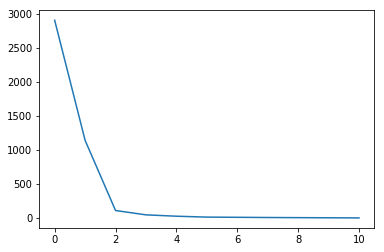

In [46]:
plt.plot(list(range(len(xf1))),xf1)
plt.show()
# you see the difference between? that's called the char-token gate.
# shall we do this? Yes.
# what about space? The same.

In [47]:
xj=xf[0]
xj[0] # this is essence, ready for grouping.

{1: {0: 'SPACE'},
 2: {0: 'DIGIT', 1: '000A'},
 3: {0: 'IDEOGRAPHIC', 1: 'FULL', 2: 'STOP'},
 4: {0: 'CJK', 1: 'UNIFIED', 2: 'IDEOGRAPH', 3: 'A'}}

In [48]:
xj[1] # the grouping result.
# can be used in group detector.

{1: {0: [('SPACE',)]},
 2: {0: [('DIGIT', 'FIVE'),
   ('DIGIT', 'ZERO'),
   ('DIGIT', 'FOUR'),
   ('DIGIT', 'TWO'),
   ('DIGIT', 'EIGHT'),
   ('DIGIT', 'NINE'),
   ('DIGIT', 'THREE'),
   ('DIGIT', 'SEVEN'),
   ('DIGIT', 'ONE'),
   ('DIGIT', 'SIX')],
  1: [('control', '000A')]},
 3: {0: [('IDEOGRAPHIC', 'FULL', 'STOP')],
  1: [('IDEOGRAPHIC', 'FULL', 'STOP')],
  2: [('IDEOGRAPHIC', 'FULL', 'STOP')]},
 4: {0: [('CJK', 'UNIFIED', 'IDEOGRAPH', '65AF'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '77A9'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '4F1A'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '5728'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '5740'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '6295'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '660E'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '611F'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '5E8F'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '6670'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '56FD'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '7231'),
   ('CJK', 'UNIFIED', 'IDEOGRAPH', '5F62'),
   ('CJK', 'UNIFIED

In [49]:
xj[4] # the rest of article.

[('LATIN', 'CAPITAL', 'LETTER', 'P'),
 ('LATIN', 'CAPITAL', 'LETTER', 'D'),
 ('LATIN', 'CAPITAL', 'LETTER', 'F'),
 ('LATIN', 'CAPITAL', 'LETTER', 'U'),
 ('LATIN', 'CAPITAL', 'LETTER', 'R'),
 ('LATIN', 'CAPITAL', 'LETTER', 'I'),
 ('LATIN', 'CAPITAL', 'LETTER', 'N'),
 ('LATIN', 'CAPITAL', 'LETTER', 'G'),
 ('LATIN', 'CAPITAL', 'LETTER', 'P'),
 ('LATIN', 'SMALL', 'LETTER', 'U'),
 ('LATIN', 'SMALL', 'LETTER', 'L'),
 ('LATIN', 'SMALL', 'LETTER', 'G'),
 ('LATIN', 'SMALL', 'LETTER', 'R'),
 ('LATIN', 'SMALL', 'LETTER', 'H'),
 ('LATIN', 'SMALL', 'LETTER', 'M'),
 ('LATIN', 'CAPITAL', 'LETTER', 'H'),
 ('LATIN', 'SMALL', 'LETTER', 'C'),
 ('LATIN', 'SMALL', 'LETTER', 'K'),
 ('LATIN', 'SMALL', 'LETTER', 'E'),
 ('LATIN', 'SMALL', 'LETTER', 'R'),
 ('LATIN', 'SMALL', 'LETTER', 'S'),
 ('LATIN', 'SMALL', 'LETTER', 'N'),
 ('LATIN', 'SMALL', 'LETTER', 'D'),
 ('LATIN', 'CAPITAL', 'LETTER', 'P'),
 ('LATIN', 'SMALL', 'LETTER', 'I'),
 ('LATIN', 'SMALL', 'LETTER', 'N'),
 ('LATIN', 'SMALL', 'LETTER', 'T'),
 ('LAT

In [50]:
# different characters must be handled with different methods.
# if using :) or something how can it be understood?
# creation is an ongoing discussion.
# maybe we shall consider the integrity problem, following the syntax.
# documentation could be found in code.
xf2=[xf1[x]/(xf1[x+1]+0.1) for x in range(len(xf1)-1)]
xf2 # trivial turning point at tail.

[2.5475418455875913,
 10.458295142071494,
 2.4168514412416853,
 1.792828685258964,
 2.066115702479339,
 1.3186813186813187,
 1.4754098360655739,
 1.4634146341463417,
 1.9047619047619047,
 20.0]

In [51]:
xf3=fast_moving_average(xf2,len(xf2)-1)
xf3,len(xf3)

(array([2.82710006, 4.76626207, 3.60422928, 3.33569023, 3.13648704,
        2.90691863, 2.76039849, 2.59646406, 2.43386243, 2.22222222]), 10)

In [52]:
xc=checkMate(xf2,xf3,2) # shall we change the parameter?
xc

[True, False, True, True, True, False, True, True, True, False]

In [53]:
xm=np.linspace(1,2,10)
xm

array([1.        , 1.11111111, 1.22222222, 1.33333333, 1.44444444,
       1.55555556, 1.66666667, 1.77777778, 1.88888889, 2.        ])

In [54]:
xm0=list(map(lambda x:checkMate(xf2,xf3,x),xm))
xm0

[[False, False, False, False, False, False, False, False, False, False],
 [True, False, False, False, False, False, False, False, False, False],
 [True, False, False, False, False, False, False, False, False, False],
 [True, False, False, False, False, False, False, False, True, False],
 [True, False, False, False, False, False, False, False, True, False],
 [True, False, True, False, True, False, False, False, True, False],
 [True, False, True, False, True, False, False, False, True, False],
 [True, False, True, False, True, False, False, True, True, False],
 [True, False, True, True, True, False, True, True, True, False],
 [True, False, True, True, True, False, True, True, True, False]]

In [55]:
xm1=list(map(lambda x: x.count(False),xm0))
xm1 # the linear stablization.

[10, 9, 9, 8, 8, 6, 6, 5, 3, 3]

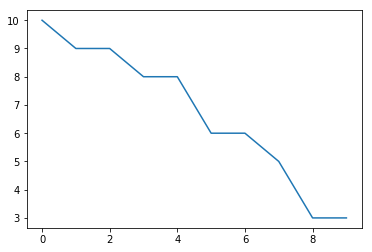

In [56]:
# self similarity. That is the most uncomprehensible trait.
plt.plot(list(range(len(xm1))),xm1)
plt.show()

In [57]:
# given a group, mark out those continuous range.
xj140=xj[1][4][0] # randomly select those ranges? select the most impactful group?
xj140 # must the range be done with original sequence? No. We can regard it as syntax matcher.

[('CJK', 'UNIFIED', 'IDEOGRAPH', '65AF'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '77A9'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '4F1A'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5728'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5740'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '6295'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '660E'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '611F'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5E8F'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '6670'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '56FD'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '7231'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5F62'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '89C1'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '6027'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '8BBA'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '8F91'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5373'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5BB6'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5343'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '7B54'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '5B83'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '7AE0'),
 ('CJK', 'UNIFIED', 'IDEOGRAPH', '

In [58]:
rx0=rangeChecker(x0,xj140)
rx0
# should add one.

[[4, 5],
 [6, 7],
 [15, 20],
 [21, 27],
 [39, 41],
 [96, 97],
 [110, 111],
 [112, 116],
 [127, 134],
 [163, 164],
 [165, 166],
 [169, 179],
 [180, 188],
 [205, 214],
 [216, 228],
 [232, 236],
 [238, 259],
 [267, 278],
 [279, 280],
 [281, 288],
 [289, 303],
 [304, 321],
 [322, 324],
 [325, 340],
 [360, 370],
 [372, 385],
 [386, 392],
 [393, 396],
 [397, 410],
 [411, 419],
 [420, 437],
 [456, 458],
 [459, 463],
 [475, 479],
 [480, 486],
 [487, 492],
 [493, 504],
 [505, 508],
 [509, 519],
 [558, 560],
 [574, 575],
 [576, 581],
 [582, 591],
 [592, 607],
 [608, 620],
 [621, 638],
 [639, 648],
 [649, 659],
 [660, 666],
 [667, 672],
 [673, 679],
 [680, 686],
 [687, 689],
 [690, 699],
 [734, 737],
 [738, 741],
 [755, 760],
 [761, 765],
 [766, 774],
 [775, 783],
 [784, 787],
 [788, 789],
 [790, 793],
 [794, 796],
 [797, 817],
 [818, 828],
 [829, 837],
 [838, 854],
 [858, 861],
 [877, 884],
 [886, 903],
 [904, 910],
 [911, 915],
 [916, 922],
 [948, 951],
 [965, 968],
 [969, 973],
 [993, 995],
 [

In [59]:
# syntax are hidden passwords.
# there could be syntax among different category with fixed part or moveable part.
dx0=[d[x[0]:x[1]] for x in rx0]
dx0

['第',
 '页',
 '黑客与画家',
 '硅谷创业之父',
 '文集',
 '美',
 '著',
 '阮一峰译',
 '人民邮电出版社',
 '第',
 '页',
 '此书将迫使你重新思考',
 '计算机编程的本质',
 '麻省理工学院副教授',
 '世界上首个互联网应用程序',
 '开发人之',
 '人类社会还没有充分理解程序员带来的美和智慧',
 '的这本书却做到了这一点',
 '描',
 '述得清晰又动人',
 '任何愿意倾听的人都会大有收获',
 '如果我们不愿意马上就失去一些重要的',
 '东西',
 '那么我们这个社会就应该学会倾听',
 '斯坦福大学法学院教授',
 '这是真正睿智之士的思维激荡',
 '读来令人着迷',
 '单单是',
 '为什么书呆子不受欢迎一文就',
 '值得你买这本书了',
 '它回答了我们这个时代的一个关键问题',
 '连线',
 '杂志主编',
 '高瞻远瞩',
 '文笔优雅清晰',
 '且不乏幽默',
 '这在黑客群体中实属罕见',
 '甚至足',
 '以跻身优秀作家的行列',
 '作者',
 '的',
 '黑客与画家',
 '是一本内容广泛的书',
 '但是重要的不是你能从中知道为什',
 '么书呆子在高中时备受挫折',
 '或者计算机语言设计和实现有什么奥妙',
 '而是他在论述每一个',
 '题目时采取的那种方法',
 '那样生动有趣',
 '富有启迪性',
 '让你莞尔一笑',
 '然后陷入思考',
 '强烈',
 '推荐此书给所有读者',
 '刨始人',
 '负责人',
 '是一名黑客',
 '一位画家',
 '还是个出色的作家',
 '他的文章清晰易懂',
 '幽默生',
 '动',
 '从艺术',
 '科学',
 '商业互相交织的角度谈论如何写出优秀的代码',
 '充满了与众不同的看法',
 '和切实可行的高见',
 '你甚至可能因为看了他的文章而改用',
 '编程哦',
 '苹果机发明人之',
 '这是我最近读到的最发人深思的一本书',
 '行文明白流畅',
 '主题多样',
 '而且风趣幽默',
 '负责人',
 '维护者',
 '图灵网站',
 '热线',
 '反馈没投稿',
 '推荐信箱',
 '有奖勘误',
 '分类建议计算机',
 '人文',
 '人民邮电出版社网址',
 '授权人民邮电出版

In [60]:
# much fucking cleaner.
# so this time we are gonna fuck this up.
# in order to check the trait of content, we need vocabulary and syntax checker.
jb0=list(map(lambda x: list(jb.cut(x)),dx0))
jb0

Building prefix dict from the default dictionary ...
Loading model from cache C:\Temp\jieba.cache
Loading model cost 1.231 seconds.
Prefix dict has been built succesfully.


[['第'],
 ['页'],
 ['黑客', '与', '画家'],
 ['硅谷', '创业', '之', '父'],
 ['文集'],
 ['美'],
 ['著'],
 ['阮', '一峰', '译'],
 ['人民邮电出版社'],
 ['第'],
 ['页'],
 ['此书', '将', '迫使', '你', '重新', '思考'],
 ['计算机', '编程', '的', '本质'],
 ['麻省理工学院', '副教授'],
 ['世界', '上', '首个', '互联网', '应用程序'],
 ['开发', '人', '之'],
 ['人类', '社会', '还', '没有', '充分', '理解', '程序员', '带来', '的', '美', '和', '智慧'],
 ['的', '这', '本书', '却', '做到', '了', '这', '一点'],
 ['描'],
 ['述', '得', '清晰', '又', '动人'],
 ['任何', '愿意', '倾听', '的', '人', '都', '会', '大有', '收获'],
 ['如果', '我们', '不', '愿意', '马上', '就', '失去', '一些', '重要', '的'],
 ['东西'],
 ['那么', '我们', '这个', '社会', '就', '应该', '学会', '倾听'],
 ['斯坦福大学', '法学院', '教授'],
 ['这是', '真正', '睿智', '之士', '的', '思维', '激荡'],
 ['读', '来', '令人', '着迷'],
 ['单单是'],
 ['为什么', '书呆子', '不', '受欢迎', '一文', '就'],
 ['值得', '你', '买', '这', '本书', '了'],
 ['它', '回答', '了', '我们', '这个', '时代', '的', '一个', '关键问题'],
 ['连线'],
 ['杂志', '主编'],
 ['高瞻远瞩'],
 ['文笔', '优雅', '清晰'],
 ['且', '不乏', '幽默'],
 ['这', '在', '黑客', '群体', '中', '实属', '罕见'],
 ['甚至', '足'],
 ['以', '跻身', '优秀作家', '的', '行列'],

In [61]:
# Viterbi Algorithm?
# How to learn from random data? Unsupervised?
# Better do this in standard format.
# The sentence grouper is related to syntax matcher.
# Must find a way to decode this.
jb1=list(map(lambda x: list(jb.cut(x,cut_all=True)),dx0))
jb1

[['第'],
 ['页'],
 ['黑客', '与', '画家'],
 ['硅谷', '创业', '之父'],
 ['文集'],
 ['美'],
 ['著'],
 ['阮', '一峰', '译'],
 ['人民', '人民邮电', '人民邮电出版社', '邮电', '出版', '出版社'],
 ['第'],
 ['页'],
 ['此书', '将', '迫使', '你', '重新', '思考'],
 ['计算', '计算机', '算机', '编程', '的', '本质'],
 ['麻省', '麻省理工', '麻省理工学院', '理工', '理工学', '理工学院', '工学', '工学院', '学院', '副教授', '教授'],
 ['世界', '上首', '首个', '互联', '互联网', '联网', '应用', '应用程序', '程序'],
 ['开发', '发人', '之'],
 ['人类',
  '社会',
  '还',
  '没有',
  '充分',
  '分理',
  '理解',
  '程序',
  '程序员',
  '带来',
  '的',
  '美',
  '和',
  '智慧'],
 ['的', '这本', '本书', '却', '做到', '了', '这', '一点'],
 ['描'],
 ['述', '得', '清晰', '又', '动人'],
 ['任何', '愿意', '倾听', '的', '人', '都', '会', '大', '有', '收获'],
 ['如果', '我们', '不', '愿意', '马上', '就', '失去', '一些', '重要', '的'],
 ['东西'],
 ['那么', '我们', '这个', '社会', '就', '应该', '学会', '倾听'],
 ['斯坦福', '斯坦福大学', '福大', '大学', '学法', '法学', '法学院', '学院', '教授'],
 ['这', '是', '真正', '睿智', '之', '士', '的', '思维', '激荡'],
 ['读来', '令人', '着迷'],
 ['单单', '单单是'],
 ['为什么', '什么', '书呆', '书呆子', '呆子', '不受', '受欢迎', '欢迎', '一文', '就'],
 ['值得', '你', 

In [62]:
# what if do this to the whole content?
xf=list(jb.cut(d))
xf
# also left for comparasion.

[' ',
 'PDF',
 '第',
 '1',
 '页',
 ' ',
 '\n',
 'URING',
 '\n',
 '黑客',
 '与',
 '画家',
 '\n',
 '硅谷',
 '创业',
 '之',
 '父',
 ' ',
 'Paul',
 ' ',
 'graham',
 '文集',
 '\n',
 'Hackers',
 ' ',
 'and',
 ' ',
 'Painters',
 ' ',
 'Big',
 ' ',
 'Ideas',
 ' ',
 'from',
 ' ',
 'the',
 ' ',
 'Computer',
 ' ',
 'Age',
 '\n',
 '[',
 '美',
 ']',
 ' ',
 'Paul',
 ' ',
 'graham',
 '著',
 '\n',
 '阮',
 '一峰',
 '译',
 '\n',
 'O',
 ' ',
 'REILLY',
 '°',
 '\n',
 '人民邮电出版社',
 '\n',
 'POSTS',
 ' ',
 'TELECOM',
 ' ',
 'PRI',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 ' ',
 'PDF',
 '第',
 '2',
 '页',
 ' ',
 '\n',
 '“',
 '此书',
 '将',
 '迫使',
 '你',
 '重新',
 '思考',
 '\n',
 '计算机',
 '编程',
 '的',
 '本质',
 '。',
 '”',
 '\n',
 'Robert',
 ' ',
 'Morris',
 '，',
 '麻省理工学院',
 '副教授',
 '，',
 '\n',
 '世界',
 '上',
 '首个',
 '互联网',
 '应用程序',
 'Vawe',
 '开发',
 '人',
 '之',
 '\n',
 '“',
 '人类',
 '社会',
 '还',
 '没有',
 '充分',
 '理解',
 '程序员',
 '带来',
 '的',
 '美',
 '和',
 '智慧',
 '，',
 ' ',
 'Graham',
 '的',
 '这',
 '本书',
 '却',
 '做到',
 '了',
 '这',
 '一点',
 '，',
 '描',
 '\n

In [63]:
sx0=setter(d)
len(sx0),sx0
# to finite the space takes 501^2 times.
# let's do it!

(501,
 ['受',
  '峰',
  '>',
  't',
  '莞',
  '又',
  '雷',
  'Ⅲ',
  '者',
  '收',
  '着',
  '最',
  '.',
  '别',
  '倾',
  '司',
  '×',
  '足',
  '°',
  '长',
  '身',
  '默',
  '是',
  '流',
  '任',
  'B',
  '何',
  '声',
  '麻',
  '妙',
  '程',
  'k',
  '盗',
  '字',
  '合',
  '甚',
  '记',
  '陆',
  '黑',
  'b',
  '启',
  '京',
  '5',
  '代',
  '样',
  '感',
  '客',
  '问',
  'd',
  '始',
  '铭',
  '则',
  '月',
  '志',
  '清',
  'A',
  '失',
  '授',
  '全',
  '群',
  '著',
  '第',
  '实',
  '负',
  '商',
  '得',
  '照',
  'm',
  'D',
  'p',
  '据',
  '员',
  'W',
  '解',
  '时',
  '优',
  '及',
  '民',
  '姆',
  'L',
  '键',
  '创',
  '果',
  'v',
  '责',
  '巍',
  '②',
  '它',
  '。',
  '件',
  '到',
  '站',
  '此',
  '包',
  '慧',
  '刨',
  '区',
  '折',
  '子',
  '度',
  '谈',
  '描',
  '/',
  '容',
  '写',
  '机',
  '文',
  '体',
  '编',
  '副',
  '登',
  '也',
  '做',
  '服',
  ':',
  '值',
  '近',
  'i',
  '互',
  '论',
  '给',
  '议',
  '1',
  '什',
  '那',
  '笔',
  '算',
  '道',
  '式',
  '之',
  '列',
  '图',
  'f',
  '答',
  'y',
  '价',
  '这',
  '‘',
  '街',
  '权',
  'M',
  '正',


In [64]:
sx1=getter(sx0,2)
sx1

['知', ')']

In [65]:
sx2=settler(d,sx1)
sx2

[['知', 603],
 [')', 1000],
 [')', 1240],
 [')', 1390],
 [')', 1600],
 [')', 1634],
 [')', 1650],
 [')', 1685],
 [')', 1832],
 [')', 2324],
 [')', 2363]]

In [66]:
sx3=reSettle(d,2,100)
sx3

{0: [['序', 227], ['序', 250], ['序', 1882], ['序', 2004], ['j', 2450]],
 1: [['质', 187], ['奥', 636], ['质', 1960], ['质', 2335]],
 2: [['上', 218], ['上', 312], ['容', 586], ['容', 1843], ['容', 1945]],
 3: [['信', 1018], ['台', 1236]],
 4: [['香', 1223], ['盗', 2354]],
 5: [['社', 133],
  ['社', 240],
  ['社', 331],
  ['社', 1134],
  ['社', 1183],
  [':', 1394],
  [':', 1471],
  ['社', 1560],
  ['社', 1570],
  [':', 1660],
  ['社', 1668],
  ['社', 2098],
  [':', 2154],
  [':', 2192],
  [':', 2208],
  [':', 2235],
  [':', 2273],
  [':', 2306],
  ['社', 2784]],
 6: [['负', 738], ['负', 948], ['面', 2882]],
 7: [['.', 1122],
  ['价', 1393],
  ['.', 1397],
  ['.', 1674],
  ['.', 1681],
  ['.', 1806],
  ['.', 2160],
  ['.', 2168],
  ['.', 2172],
  ['.', 2215],
  ['价', 2305],
  ['.', 2490],
  ['.', 2521],
  ['.', 2649],
  ['.', 2739]],
 8: [['开', 232],
  ['6', 1008],
  ['6', 2123],
  ['开', 2190],
  ['6', 2204],
  ['6', 2210],
  ['6', 2218],
  ['6', 2332],
  ['6', 2344],
  ['6', 2364]],
 9: [['泛', 588], ['仅', 1210]],
 

In [67]:
it=iterables(d,2)
it

{1: [(' ',),
  ('P',),
  ('D',),
  ('F',),
  ('第',),
  ('1',),
  ('页',),
  (' ',),
  ('\n',),
  ('U',),
  ('R',),
  ('I',),
  ('N',),
  ('G',),
  ('\n',),
  ('黑',),
  ('客',),
  ('与',),
  ('画',),
  ('家',),
  ('\n',),
  ('硅',),
  ('谷',),
  ('创',),
  ('业',),
  ('之',),
  ('父',),
  (' ',),
  ('P',),
  ('a',),
  ('u',),
  ('l',),
  (' ',),
  ('g',),
  ('r',),
  ('a',),
  ('h',),
  ('a',),
  ('m',),
  ('文',),
  ('集',),
  ('\n',),
  ('H',),
  ('a',),
  ('c',),
  ('k',),
  ('e',),
  ('r',),
  ('s',),
  (' ',),
  ('a',),
  ('n',),
  ('d',),
  (' ',),
  ('P',),
  ('a',),
  ('i',),
  ('n',),
  ('t',),
  ('e',),
  ('r',),
  ('s',),
  (' ',),
  ('B',),
  ('i',),
  ('g',),
  (' ',),
  ('I',),
  ('d',),
  ('e',),
  ('a',),
  ('s',),
  (' ',),
  ('f',),
  ('r',),
  ('o',),
  ('m',),
  (' ',),
  ('t',),
  ('h',),
  ('e',),
  (' ',),
  ('C',),
  ('o',),
  ('m',),
  ('p',),
  ('u',),
  ('t',),
  ('e',),
  ('r',),
  (' ',),
  ('A',),
  ('g',),
  ('e',),
  ('\n',),
  ('[',),
  ('美',),
  (']',),
  (' ',),
  

In [68]:
it0=it[2]
it0

[(' ', 'P'),
 (' ', 'D'),
 (' ', 'F'),
 (' ', '第'),
 (' ', '1'),
 (' ', '页'),
 (' ', ' '),
 (' ', '\n'),
 (' ', 'U'),
 (' ', 'R'),
 (' ', 'I'),
 (' ', 'N'),
 (' ', 'G'),
 (' ', '\n'),
 (' ', '黑'),
 (' ', '客'),
 (' ', '与'),
 (' ', '画'),
 (' ', '家'),
 (' ', '\n'),
 (' ', '硅'),
 (' ', '谷'),
 (' ', '创'),
 (' ', '业'),
 (' ', '之'),
 (' ', '父'),
 (' ', ' '),
 (' ', 'P'),
 (' ', 'a'),
 (' ', 'u'),
 (' ', 'l'),
 (' ', ' '),
 (' ', 'g'),
 (' ', 'r'),
 (' ', 'a'),
 (' ', 'h'),
 (' ', 'a'),
 (' ', 'm'),
 (' ', '文'),
 (' ', '集'),
 (' ', '\n'),
 (' ', 'H'),
 (' ', 'a'),
 (' ', 'c'),
 (' ', 'k'),
 (' ', 'e'),
 (' ', 'r'),
 (' ', 's'),
 (' ', ' '),
 (' ', 'a'),
 (' ', 'n'),
 (' ', 'd'),
 (' ', ' '),
 (' ', 'P'),
 (' ', 'a'),
 (' ', 'i'),
 (' ', 'n'),
 (' ', 't'),
 (' ', 'e'),
 (' ', 'r'),
 (' ', 's'),
 (' ', ' '),
 (' ', 'B'),
 (' ', 'i'),
 (' ', 'g'),
 (' ', ' '),
 (' ', 'I'),
 (' ', 'd'),
 (' ', 'e'),
 (' ', 'a'),
 (' ', 's'),
 (' ', ' '),
 (' ', 'f'),
 (' ', 'r'),
 (' ', 'o'),
 (' ', 'm'),
 (' ', '

In [69]:
it0[:3]
# rb0=rebuttle(d,it0[:3])
# rb0

[(' ', 'P'), (' ', 'D'), (' ', 'F')]

In [70]:
# are we a pair?
rb1=rebuttle(d,it0[:3])
rb1

{(' ', 'P'): [[' ', 0],
  ['P', 1],
  [' ', 7],
  [' ', 27],
  ['P', 28],
  [' ', 32],
  [' ', 49],
  [' ', 53],
  ['P', 54],
  [' ', 62],
  [' ', 66],
  [' ', 72],
  [' ', 77],
  [' ', 81],
  [' ', 90],
  [' ', 98],
  ['P', 99],
  [' ', 103],
  [' ', 118],
  ['P', 135],
  [' ', 140],
  [' ', 148],
  ['P', 149],
  [' ', 159],
  ['P', 160],
  [' ', 166],
  [' ', 197],
  [' ', 260],
  [' ', 343],
  [' ', 352],
  [' ', 445],
  ['P', 464],
  [' ', 468],
  [' ', 526],
  [' ', 538],
  [' ', 548],
  [' ', 562],
  ['P', 563],
  [' ', 567],
  [' ', 705],
  [' ', 720],
  [' ', 730],
  [' ', 743],
  ['P', 744],
  [' ', 748],
  [' ', 866],
  [' ', 929],
  [' ', 937],
  [' ', 952],
  [' ', 1123],
  [' ', 1164],
  [' ', 1250],
  [' ', 1261],
  [' ', 1269],
  [' ', 1273],
  [' ', 1278],
  [' ', 1283],
  [' ', 1286],
  [' ', 1290],
  [' ', 1300],
  [' ', 1303],
  ['P', 1304],
  [' ', 1312],
  [' ', 1321],
  [' ', 1324],
  [' ', 1362],
  [' ', 1367],
  [' ', 1373],
  [' ', 1379],
  [' ', 1383],
  [' ',

In [71]:
len(it0) # man this is disgusting.

4223871

In [72]:
rtx=getterII(it0,500)
rtx
# rb0=rebuttle(d,it0)
# rb0

[('O', '体'),
 ('每', '的'),
 ('"', 'w'),
 ('笔', '风'),
 ('m', 'r'),
 ('h', 'B'),
 ('我', '以'),
 ('优', '文'),
 ('的', '0'),
 ('社', 'y'),
 ('R', '式'),
 ('瞩', '奥'),
 ('s', '式'),
 (' ', '\n'),
 ('a', 'a'),
 ('d', '容'),
 ('本', ' '),
 ('集', '英'),
 ('》', 'a'),
 ('a', 't'),
 ('\n', '客'),
 ('r', 'n'),
 (' ', 'p'),
 ('机', '父'),
 ('者', 't'),
 ('和', '0'),
 ('p', 'P'),
 ('\n', '含'),
 ('父', '7'),
 ('谷', 'r'),
 ('迷', 'r'),
 ('互', '责'),
 ('\n', 'e'),
 ('了', '满'),
 ('令', 'T'),
 ('4', 'b'),
 ('秀', 't'),
 ('简', 'o'),
 ('M', 'e'),
 ('b', 'o'),
 ('交', ':'),
 (' ', '号'),
 ('以', 'o'),
 ('之', 'h'),
 ('o', '发'),
 ('P', '算'),
 ('的', '适'),
 ('m', '文'),
 ('1', '出'),
 ('热', '的'),
 ('不', 'h'),
 ('护', '"'),
 ('a', '\n'),
 ('①', '0'),
 ('听', '/'),
 ('-', 'N'),
 ('i', '\n'),
 ('e', '黑'),
 ('5', 'a'),
 ('c', ' '),
 (' ', ' '),
 ('，', 'f'),
 ('z', '，'),
 ('y', 'n'),
 ('书', '线'),
 ('\n', 'a'),
 ('列', ' '),
 ('e', 'r'),
 (')', ' '),
 ('含', ' '),
 ('2', 'S'),
 ('的', 't'),
 ('件', "'"),
 ('愿', 'c'),
 ('s', '书'),
 ('9', '邮'),
 ('r'

In [73]:
it0[:3]
# that was freaky.
# how to find likelyhood between those sequences?
# by the same char or assume some to be the same?
# how about using GA?

[(' ', 'P'), (' ', 'D'), (' ', 'F')]

In [74]:
ls=rebuttle(d,rtx)
ls

{('O', '体'): [['O', 117],
  ['O', 136],
  ['O', 146],
  ['体', 498],
  ['O', 1093],
  ['O', 1157],
  ['体', 1206],
  ['O', 1527],
  ['O', 2402],
  ['O', 2471],
  ['O', 2575],
  ['O', 2747],
  ['体', 2773],
  ['O', 2803],
  ['体', 2826],
  ['O', 2852]],
 ('每', '的'): [['的', 185],
  ['的', 254],
  ['的', 267],
  ['的', 295],
  ['的', 320],
  ['的', 380],
  ['的', 430],
  ['的', 516],
  ['的', 574],
  ['的', 589],
  ['的', 596],
  ['每', 645],
  ['的', 654],
  ['的', 771],
  ['的', 776],
  ['的', 803],
  ['的', 814],
  ['的', 825],
  ['的', 834],
  ['的', 848],
  ['的', 893],
  ['的', 899],
  ['的', 1868],
  ['的', 1884],
  ['的', 1904],
  ['的', 1932],
  ['的', 1935],
  ['的', 1943],
  ['的', 1958],
  ['的', 1967],
  ['的', 2028],
  ['的', 2797],
  ['的', 2820],
  ['的', 2830],
  ['的', 2846],
  ['的', 2870],
  ['的', 2888]],
 ('"', 'w'): [['w', 230],
  ['w', 346],
  ['"', 928],
  ['"', 930],
  ['"', 936],
  ['w', 974],
  ['w', 975],
  ['w', 976],
  ['w', 1138],
  ['w', 1139],
  ['w', 1140],
  ['"', 1201],
  ['w', 1387],
  ['w'

In [75]:
# don't be mean, cause computer can only compute limited things.
itx=getterII(d,50)
itx # damn is this the gap here?

['R',
 '从',
 '高',
 'p',
 'p',
 'a',
 'e',
 '限',
 '书',
 '中',
 '箱',
 ' ',
 '数',
 'a',
 ' ',
 '买',
 '2',
 'N',
 ' ',
 '4',
 'l',
 '1',
 '任',
 '-',
 '阮',
 '本',
 '就',
 'i',
 's',
 't',
 'l',
 '"',
 'e',
 'n',
 '志',
 '格',
 '原',
 '1',
 '1',
 '4',
 '谈',
 '号',
 'r',
 ' ',
 '\n',
 '富',
 '9',
 '版',
 'a',
 '社']

In [76]:
itx0=iterables(itx,3)
itx0

{1: [('R',),
  ('从',),
  ('高',),
  ('p',),
  ('p',),
  ('a',),
  ('e',),
  ('限',),
  ('书',),
  ('中',),
  ('箱',),
  (' ',),
  ('数',),
  ('a',),
  (' ',),
  ('买',),
  ('2',),
  ('N',),
  (' ',),
  ('4',),
  ('l',),
  ('1',),
  ('任',),
  ('-',),
  ('阮',),
  ('本',),
  ('就',),
  ('i',),
  ('s',),
  ('t',),
  ('l',),
  ('"',),
  ('e',),
  ('n',),
  ('志',),
  ('格',),
  ('原',),
  ('1',),
  ('1',),
  ('4',),
  ('谈',),
  ('号',),
  ('r',),
  (' ',),
  ('\n',),
  ('富',),
  ('9',),
  ('版',),
  ('a',),
  ('社',)],
 2: [('R', '从'),
  ('R', '高'),
  ('R', 'p'),
  ('R', 'p'),
  ('R', 'a'),
  ('R', 'e'),
  ('R', '限'),
  ('R', '书'),
  ('R', '中'),
  ('R', '箱'),
  ('R', ' '),
  ('R', '数'),
  ('R', 'a'),
  ('R', ' '),
  ('R', '买'),
  ('R', '2'),
  ('R', 'N'),
  ('R', ' '),
  ('R', '4'),
  ('R', 'l'),
  ('R', '1'),
  ('R', '任'),
  ('R', '-'),
  ('R', '阮'),
  ('R', '本'),
  ('R', '就'),
  ('R', 'i'),
  ('R', 's'),
  ('R', 't'),
  ('R', 'l'),
  ('R', '"'),
  ('R', 'e'),
  ('R', 'n'),
  ('R', '志'),
  ('R', '格'),
  

In [77]:
ls0=rebuttle(d,itx0[3])
ls0

{('R', '从', '高'): [['R', 10],
  ['R', 119],
  ['R', 150],
  ['R', 191],
  ['高', 475],
  ['从', 601],
  ['高', 613],
  ['R', 701],
  ['从', 790],
  ['高', 835],
  ['R', 1095],
  ['R', 1158],
  ['R', 1313],
  ['R', 1419],
  ['R', 1528],
  ['R', 2404],
  ['R', 2473],
  ['R', 2578],
  ['R', 2749],
  ['R', 2804],
  ['R', 2854]],
 ('R', '从', 'p'): [['R', 10],
  ['p', 85],
  ['R', 119],
  ['R', 150],
  ['R', 191],
  ['从', 601],
  ['R', 701],
  ['从', 790],
  ['p', 857],
  ['R', 1095],
  ['p', 1142],
  ['p', 1144],
  ['R', 1158],
  ['p', 1307],
  ['R', 1313],
  ['p', 1315],
  ['R', 1419],
  ['p', 1495],
  ['R', 1528],
  ['p', 1543],
  ['p', 1737],
  ['p', 2133],
  ['p', 2135],
  ['p', 2153],
  ['p', 2161],
  ['p', 2163],
  ['R', 2404],
  ['p', 2425],
  ['p', 2458],
  ['R', 2473],
  ['R', 2578],
  ['p', 2624],
  ['p', 2697],
  ['p', 2723],
  ['R', 2749],
  ['R', 2804],
  ['R', 2854]],
 ('R', '从', 'a'): [['R', 10],
  ['a', 29],
  ['a', 35],
  ['a', 37],
  ['a', 43],
  ['a', 50],
  ['a', 55],
  ['a', 

In [78]:
# the computational limit.
# time to switch notebook?
len(itx0[3])

19600

In [ ]:
# too much combinations. computer will explode.